# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Erwin Saputra]
- **Email:** [erwindzeko48@gmail.com]
- **ID Dicoding:** [erwin_saputra_3DZz]

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat penyewaan sepeda dalam beberapa bulan terakhir?
- Kapan penyewaan sepeda paling banyak dan paling sedikit disewa oleh pengguna?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour = pd.read_csv('data/hour.csv')
hour.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


IMPORT DATA PENYEWAAN SEPEDA PER JAM  DARI FILE CSV  & MENAMPILKAN 5 DATA TERATAS

In [ ]:
day = pd.read_csv('Bike-sharing-dataset/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


IMPORT DATA PENYEWAAN SEPEDA PER HARI  DARI FILE CSV  & MENAMPILKAN 5 DATA TERATAS

**Insight:**
- Mengetahui bagaimana tingkat penyewaan sepeda dalam beberapa bulan terakhir
- Mengetahui kapan waktu penyewaan terbanyak dilihat dari musim, bulan, jam, hari libur/tidak, cuaca, suhu, kelembapan, kecepatan angin, dan tipe pengguna

### Assessing Data

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


MELIHAT NAMA VARIABEL DAN TIPE DATA DARI DATA PER JAM, VARIABEL DTEDAY MASIH BERTIPE OBJEK HARUSNYA DATE TIME

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


MELIHAT NAMA VARIABEL DAN TIPE DATA DARI DATA PER HARI, DTEDAY MASIH BERTIPE OBJEK HARUSNYA DATE TIME

In [ ]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

MENGECEK BANYAKNYA MISSING VALUE PADA DATA PENYEWAAN PER JAM. DATA PENYEWAAN PER JAM TIDAK MEMILIKI MISSING VALUE

In [ ]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

MENGECEK BANYAKNYA MISSING VALUE PADA DATA PENYEWAAN PER HARI. DATA PENYEWAAN PER HARI TIDAK MEMILIKI MISSING VALUE

In [ ]:
print("Jumlah duplikasi: ",hour.duplicated().sum())

Jumlah duplikasi:  0


MENGECEK DATA DUPLIKAT PADA DATA PENYEWAAN PERJAM. DATA PENYEWAAN PER JAM TIDAK ADA YANG DUPLIKAT

In [ ]:
print("Jumlah duplikasi: ",day.duplicated().sum())

Jumlah duplikasi:  0


MENGECEK DATA DUPLIKAT PADA DATA PENYEWAAN PER HARI. DATA PENYEWAAN PER HARI TIDAK ADA YANG DUPLIKAT

In [ ]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


MENAMPILKAN STATISTIK DESKRIPTIF UNTUK DATA PER JAM YANG BERTIPE NUMERIC. BERDASARKAN RINGKASAN STATISTIK DI ATAS DATA PENYEWA PER JAM TIDAK ADA MASALAH

In [ ]:
q25, q75 = np.percentile(hour['cnt'], 25), np.percentile(hour['cnt'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in hour['cnt'] if x < minimum or x > maximum]
print(outliers)

[651, 644, 712, 676, 734, 662, 782, 749, 713, 746, 651, 686, 690, 679, 685, 648, 721, 801, 750, 801, 729, 779, 649, 810, 801, 662, 957, 830, 686, 657, 664, 684, 644, 658, 654, 703, 681, 729, 757, 800, 684, 744, 759, 822, 698, 655, 643, 646, 692, 744, 704, 656, 738, 671, 678, 678, 660, 658, 681, 712, 676, 673, 781, 775, 677, 748, 776, 700, 819, 668, 649, 691, 654, 732, 709, 664, 702, 654, 653, 683, 664, 681, 743, 666, 729, 813, 704, 706, 643, 769, 680, 717, 710, 705, 732, 770, 779, 659, 678, 733, 650, 873, 846, 852, 868, 745, 812, 669, 704, 730, 672, 645, 785, 785, 719, 692, 798, 752, 653, 781, 710, 671, 839, 796, 693, 827, 785, 694, 668, 679, 647, 702, 644, 684, 686, 678, 644, 662, 665, 834, 822, 645, 710, 850, 790, 668, 724, 782, 681, 869, 813, 700, 793, 723, 651, 800, 831, 681, 653, 713, 857, 744, 671, 719, 867, 823, 653, 823, 693, 723, 673, 811, 795, 643, 691, 672, 646, 833, 791, 656, 900, 824, 687, 843, 804, 643, 705, 697, 747, 730, 646, 722, 689, 849, 872, 649, 872, 819, 674, 830,

MELAKUKAN PENGECEKAN OUTLIER PADA DATA PENYEWAAN PERJAM.
BANYAK DITEMUKAN OUTLIER PADA DATA PENYEWAAN PER JAM, PERLU DILIHAT LAGI BERDASARKAN VARIABEL LAINNYA SEPERTI WAKTU DAN HARI TERTENTU

In [ ]:
q25, q75 = np.percentile(day['cnt'], 25), np.percentile(day['cnt'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in day['cnt'] if x < minimum or x > maximum]
print(outliers)

[]


MELAKUKAN PENGECEKAN OUTLIER UNTUK DATA PENYEWAAN PER HARI DAN TIDAK DITEMUKAN OUTLIER, SALAH SATU PENYEBAB DI DATA PER JAM BANYAK OUTLIER ADALAH KARENA DI BISA SAJA DI JAM JAM TERTENTU SANGAT TINGGI PENYEWAAN SEPEDANYA

**Insight:**
- VARIABEL DTEDAY PERLU DI KONVERSI KE TIPE DATA DATETIME
- DATA PENYEWAAN PER JAM DAN PER HARI LENGKAP TIDAK MEMILIKI MISSING VALUE
- DATA PER JAM DAN PER HARI TIDAK ADA YANG DUPLIKAT
- DATA JUMLAH PENGGUNA PER JAM MEMILIKI BANYAK OUTLIER, NAMUN SETELAH DI CEK DI DATA JUMLAH PENGGUNNA PERHARI TIDAK ADA OUTLIER, KEMUNGKINAN OUTLIER DISEBABKAN OLEH DATA PER JAM KARENA DI JAM TERTENTU PENYEWAAN SEPEDA TINGGI

### Cleaning Data

In [ ]:
hour['dteday'] = pd.to_datetime(hour['dteday'])

MENGUBAH TIPE DATA DTEDAY MENJADI DATE TIME PADA DATA PENYEWAAN PER JAM

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

MELAKUKAN PENGECEKAN APAKAH TIPE DATA DARI DTEDAY SUDAH BERUBAH MENJADI DATETIME

In [ ]:
day['dteday'] = pd.to_datetime(day['dteday'])

MENGUBAH TIPE DATA DTEDAY MENJADI MENJADI DATETIME PADA DATA PENYEWAAN PER HARI

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

MELAKUKAN PENGECEKAN APAKAH TIPE DAYA DARI DTEDAY SUDAH BERUBAH MENAJDI DATETIME

**Insight:**
- MENGUBAH TIPE DATA DTEDAY MENJADI DATETIME AKAN BERGUNA SAAT EKSPLORASI DATA MAUPUN ANALISIS DATA LEBIH LANJUT

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


MELIHAT RANGKUMAN PARAMETER STATISTIK DARI SEMUA TIPE DATA YANG ADA DI DATA PENGGUNA PER JAM

In [ ]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


MELIHAT RANGKUMAN PARAMETER STATISTIK DARI SEMUA TIPE DATA YANG ADA DI DATA PENGGUNA PER HARI

In [ ]:
hour.groupby(by="hr").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual            registered                 cnt            
      sum       mean        sum        mean     sum        mean
hr                                                             
0    7375  10.158402      31755   43.739669   39130   53.898072
1    4709   6.504144      19455   26.871547   24164   33.375691
2    3412   4.772028      12940   18.097902   16352   22.869930
3    1893   2.715925       6281    9.011478    8174   11.727403
4     874   1.253945       3554    5.098996    4428    6.352941
5    1012   1.411437      13249   18.478382   14261   19.889819
6    3017   4.161379      52115   71.882759   55132   76.044138
7    8037  11.055021     146134  201.009629  154171  212.064649
8   15761  21.679505     245240  337.331499  261001  359.011004
9   22458  30.891334     136980  188.418157  159438  219.309491
10  33789  46.477304      92468  127.191197  126257  173.668501
11  43286  59.540578     108034  148.602476  151320  208.143054
12  49718  68.293956     134696  185.021978  184414  253.315934
13  52713  72.308642     132206  181.352538  184919  253.661180
14  55089  75.567901     120563  165.381344  175652  240.949246
15  54606  74.905350     128543  176.327846  183149  251.233196
16  53834  73.745205     173914  238.238356  227748  311.983562
17  54220  74.273973     282640  387.178082  336860  461.452055
18  44496  61.120879     265276  364.390110  309772  425.510989
19  35505  48.770604     191284  262.752747  226789  311.523352
20  26378  36.233516     138172  189.796703  164550  226.030220
21  20570  28.255495     104875  144.059066  125445  172.314560
22  16200  22.252747      79412  109.082418   95612  131.335165
23  11065  15.199176      52876   72.631868   63941   87.831044

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN JAM SEWA YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by=["weekday"]).agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual              registered                  cnt             
            sum         mean        sum         mean     sum         mean
weekday                                                                  
0        140521  1338.295238     303506  2890.533333  444027  4228.828571
1         70784   674.133333     384719  3663.990476  455503  4338.123810
2         57843   556.182692     411266  3954.480769  469109  4510.663462
3         57319   551.144231     415729  3997.394231  473048  4548.538462
4         61460   590.961538     423935  4076.298077  485395  4667.259615
5         78238   752.288462     409552  3938.000000  487790  4690.288462
6        153852  1465.257143     323955  3085.285714  477807  4550.542857

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN WEEKDAY (HARI) YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by="holiday").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual              registered                   cnt             
            sum         mean        sum         mean      sum         mean
holiday                                                                   
0        597658   841.771831    2616586  3685.332394  3214244  4527.104225
1         22359  1064.714286      56076  2670.285714    78435  3735.000000

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN HOLIDAY (HARI LIBUR) YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by="workingday").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual              registered                   cnt             
               sum         mean        sum         mean      sum         mean
workingday                                                                   
0           316732  1371.134199     683537  2959.034632  1000269  4330.168831
1           303285   606.570000    1989125  3978.250000  2292410  4584.820000

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN WORKING DAY (HARI KERJA) YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by="weathersit").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual             registered                   cnt             
               sum        mean        sum         mean      sum         mean
weathersit                                                                  
1           446346  964.030238    1811606  3912.755940  2257952  4876.786177
2           169776  687.352227     827082  3348.510121   996858  4035.862348
3             3895  185.476190      33974  1617.809524    37869  1803.285714

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN WEATHERSIT DAY (KELOMPOK CUACA) YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by="mnth").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual              registered                  cnt             
        sum         mean        sum         mean     sum         mean
mnth                                                                 
1     12042   194.225806     122891  1982.112903  134933  2176.338710
2     14963   262.508772     136389  2392.789474  151352  2655.298246
3     44444   716.838710     184476  2975.419355  228920  3692.258065
4     60802  1013.366667     208292  3471.533333  269094  4484.900000
5     75285  1214.274194     256401  4135.500000  331686  5349.774194
6     73906  1231.766667     272436  4540.600000  346342  5772.366667
7     78157  1260.596774     266791  4303.080645  344948  5563.677419
8     72039  1161.919355     279155  4502.500000  351194  5664.419355
9     70323  1172.050000     275668  4594.466667  345991  5766.516667
10    59760   963.870968     262592  4235.354839  322352  5199.225806
11    36603   610.050000     218228  3637.133333  254831  4247.183333
12    21693   349.887097     189343  3053.919355  211036  3403.806452

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN BULAN YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by="season").agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual              registered                   cnt             
           sum         mean        sum         mean      sum         mean
season                                                                   
1        60622   334.928177     410726  2269.204420   471348  2604.132597
2       203522  1106.097826     715067  3886.233696   918589  4992.331522
3       226091  1202.611702     835038  4441.691489  1061129  5644.303191
4       129782   729.112360     711831  3999.050562   841613  4728.162921

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN MUSIM YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by=["season","mnth"]).agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "cnt": "sum"
})

temp       hum  windspeed     cnt
season mnth                                       
1      1     0.236444  0.585828   0.206303  134933
       2     0.299226  0.567465   0.215684  151352
       3     0.390549  0.569831   0.226236  142065
       12    0.297951  0.638425   0.213500   42998
2      3     0.390520  0.622373   0.216269   86855
       4     0.469999  0.588063   0.234482  269094
       5     0.594798  0.688958   0.182989  331686
       6     0.662542  0.591677   0.181829  230954
3      6     0.727208  0.544063   0.192602  115388
       7     0.755470  0.597876   0.166059  344948
       8     0.708582  0.637730   0.172918  351194
       9     0.624335  0.718313   0.170119  249599
4      9     0.594896  0.704818   0.154466   96392
       10    0.485012  0.693761   0.175205  322352
       11    0.369220  0.624876   0.183801  254831
       12    0.338375  0.681229   0.156319  168038

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN MUSIM DAN BULAN YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

In [ ]:
day.groupby(by=["season","weathersit"]).agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "cnt": "sum"
})

temp       hum  windspeed     cnt
season weathersit                                       
1      1           0.301221  0.514689   0.225780  312036
       2           0.293678  0.696331   0.191023  155573
       3           0.268523  0.604271   0.290517    3739
2      1           0.563402  0.552617   0.202740  626986
       2           0.520739  0.739276   0.200482  288096
       3           0.365278  0.880694   0.301000    3507
3      1           0.720862  0.589422   0.170204  799443
       2           0.674583  0.735920   0.174148  250679
       3           0.592228  0.902255   0.211753   11007
4      1           0.404918  0.603229   0.164738  519487
       2           0.446267  0.734481   0.176139  302510
       3           0.456341  0.915813   0.219797   19616

MEMBUAT PIVOT TABEL JUMLAH DAN RATA RATA PENYEWA BERDASARKAN MUSIM DAN KELOMPOK CUACA YANG DIBAGI BERDASARKAN CASUAL(BUKAN MEMBER), REGISTERED (MEMBER), AND CNT (TOTAL MEMBER DAN NON MEMBER)

**Insight:**
- JUMLAH DAN RATA-RATA PENYEWA TERBANYAK BERADA DI PUKUL 17.00-17.59, JIKA DILIHAT DARI KELOMPOKNYA PENYEWA YANG TEREGISTRASI PALING BANYAK MENYEWA DI PUKUL 17.00-17.59, NAMUN UNTUK KELOMPOK CASUAL PALING BANYAK MENYEWA PADA PUKUL 14.00-14.59
- JUMLAH DAN RATA-RATA PENYEWA TERBANYAK BERADA DI HARI JUMAT (KODE 5), NAMUN JIKA DILIHAT DARI KELOMPOK PENYEWA, PENYEWA YANG TEREGISTRASI PALING BANYAK MENYEWA DI HARI KAMIS (KODE 4), SEDANGKAN UNTUK KELOMPOK CASUAL PALING BANYAK MENYEWA DI HARI SABTU DAN MINGGU (KODE 0 DAN 6)
- JUMLAH DAN RATA-RATA PENYEWA PALING BANYAK PADA BUKAN HARI LIBUR, INI SEJALAN DENGAN KELOMPOK PENYEWA TERIGTRASI, NAMUN UNTUK PENYEWA CASUAL PALING BANYAK MENYEWA DI HARI LIBUR
- JUMLAH DAN RATA-RATA PENYEWA PALING BANYAK PADA HARI KERJA, INI SEJALAN DENGAN KELOMPOK PENYEWA TEREGISTRASI, NAMUN UNTUK PENYEWA CASUAL PALING BANYAK PADA HARI SELAIN HARI KERJA
- JUMLAH DAN RATA-RATA PENYEWA PALING BANYAK PADA SAAT CUACA CERAH, SEDIKIT BERAWAN DAN BERAWAN SEBAGIAN, BEGITU PULA JIKA DILIHAT BERDASALKAN KELOMPOK PENYEWA
- JUMLAH DAN RATA-RATA PENYEWA PALING BANYAK PADA BULAN JUNI (6),  NAMUN JIKA DILHAT DARI KELOMPOK PENYEWA, PENYEWA TEREGISTRASI PALING BANYAK PADA BULAN SEPTEMBER (9), SEDANGKAN KELOMPOK PENYEWA CASUAL PALING BANYAK PADA BULAN JULI (7)
- JUMLAH DAN RATA-RATA PENYEWA PALING BANYAK PADA MUSIM GUGUR (3), BAIK UNTUK PENYEWA CASUAL MAUPUN TEREGISTRASI
- JUMLAH PENYEWA PALING BANYAK BULAN AGUSTUS PADA MUSIM GUGUR SAAT RATA-RATA SUHU AGAK TINGGI, KELEMBAPAN UDARA SEDANG, DAN KECEPATAN ANGIN CENDERUNG RENDAH
- JUMLAH PENYEWA PALING BANYAK PADA SAAT CUACA CERAH, SEDIKIT BERAWAN, ATAU SEBAGIAN BERAWAN PADA MUSIM GUGUR, SAAT SUHU TINGGI, KELEMBAPAN RENDAH, DAN KECEPATAN ANGIN RENDAH
- RATA-RATA PENYEWA PALING BANYAK PADA SAAT SORE HARI DAN PALING SEDIKIT SAAT DINI HARI

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana tingkat penyewaan sepeda dalam beberapa bulan terakhir?

### Pertanyaan 2:

- Kapan penyewaan sepeda paling banyak dan paling sedikit disewa oleh pengguna?

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8572\2219545054.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month = filtered_hour.resample(rule='M', on='dteday').agg({


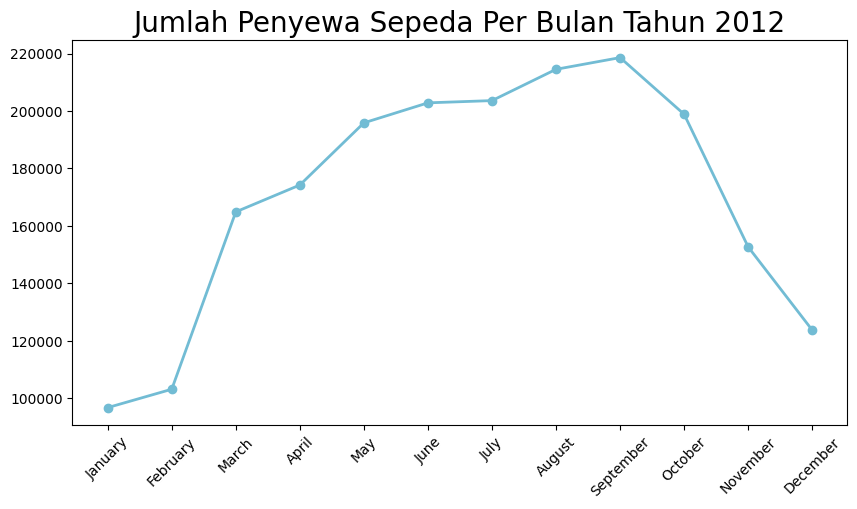

In [ ]:
filtered_hour = hour[hour['dteday'] >= "2012-01-01"] ###FILTER DATA UNTUK TAHUN 2012###
filtered_hour.head() ###MENAMPILKAN 5 DATA TERATAS###

month = filtered_hour.resample(rule='M', on='dteday').agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}) ###MEMBUAT VARIABEL MONTH DENGAN MELAKUKAN RESAMPLE BERDASARKAN BULAN PADA VARIABEL DTEDAY PADA DATA PENYEWA PERJAM YANG TELAH DIFILTER TAHUN 2012###
month.index = month.index.strftime('%B') ###MENGUBAH INDEKS MENJADI NAMA BULAN###
month = month.reset_index() ###MELAKUKAN RESET INDEKS###
month.rename(columns={
    "temp": "suhu",
    "hum": "kelembapan",
    "windspeed": "kecepatan_angin",
    "casual": "non_member",
    "registered": "member",
    "cnt": "all_pelanggan"
},inplace=True) ###MELAKUKAN GANTI NAMA KOLOM ###
plt.figure(figsize=(10, 5)) 
plt.plot(month["dteday"], month["all_pelanggan"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Jumlah Penyewa Sepeda Per Bulan Tahun 2012", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=10) 
plt.show() ###MEMBUAT GRAFIK GARIS DARI JUMLAH PENYEWA PER BULAN###

MEMBUAT GRAFIK GARIS JUMLAH PENYEWA PERBULAN MENGGUNAKAN DATA PENYEWA PER JAM DENGAN MEMANFAATKAN VARIABEL DTEDAY (TANGGAL)

Text(0.5, 1.0, 'Perbandingan Penyewa Member dan Non Member')

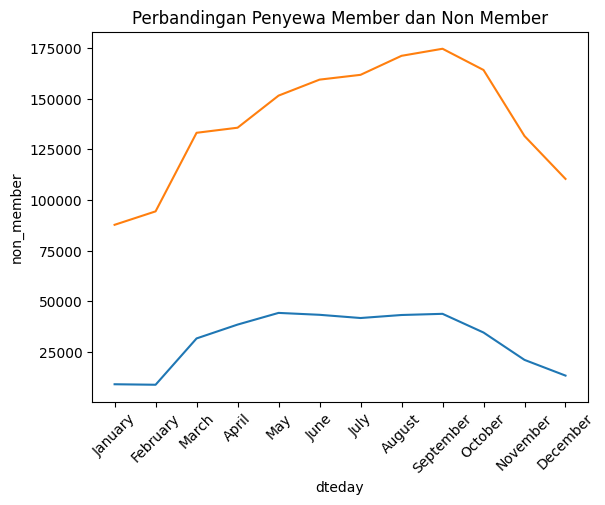

In [ ]:
sns.lineplot(data=month,x="dteday", y="non_member")
sns.lineplot(data=month,x="dteday", y="member")
plt.xticks(fontsize=10, rotation = 45) 
plt.title("Perbandingan Penyewa Member dan Non Member")

MEMBUAT PERBANDINGAN JUMLAH PENYEWA MEMBER DAN NON MEMBER DALAM SATU FRAME MENGGUNAKAN LIBRARY SEABORN

<Axes: xlabel='dteday', ylabel='suhu'>

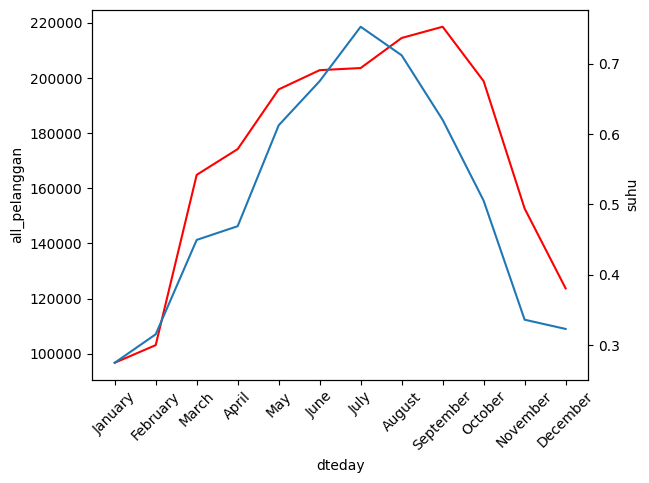

In [ ]:
fig, ax1 = plt.subplots() 
sns.lineplot(data=month,x="dteday", y="all_pelanggan", ax=ax1, color = "red")
plt.xticks(fontsize=10, rotation = 45) 
ax2 = ax1.twinx()
sns.lineplot(data=month,x="dteday", y="suhu", ax=ax2)


MELIHAT HUBUNGAN ANTARA JUMLAH PENYEWA DENGAN SUHU SETIAP BULAN

<Axes: xlabel='dteday', ylabel='kelembapan'>

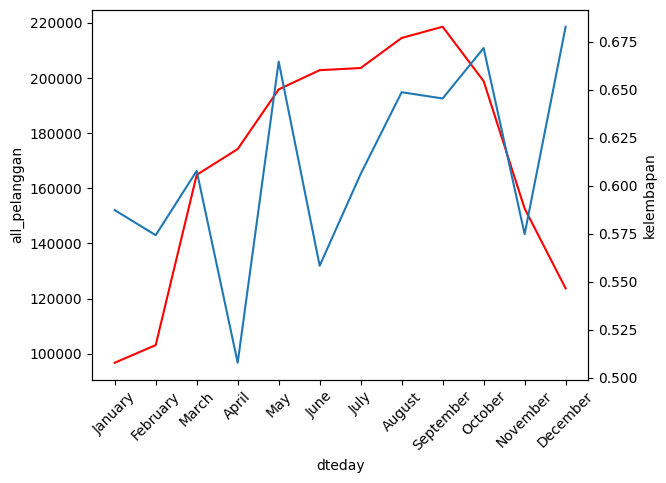

In [ ]:
fig, ax1 = plt.subplots() 
sns.lineplot(data=month,x="dteday", y="all_pelanggan", ax=ax1, color = "red")
plt.xticks(fontsize=10, rotation = 45) 
ax2 = ax1.twinx()
sns.lineplot(data=month,x="dteday", y="kelembapan", ax=ax2)


MELIHAT HUBUNGAN ANTARA JUMLAH PENYEWA DENGAN KELEMBAPAN SETIAP BULAN

<Axes: xlabel='dteday', ylabel='kecepatan_angin'>

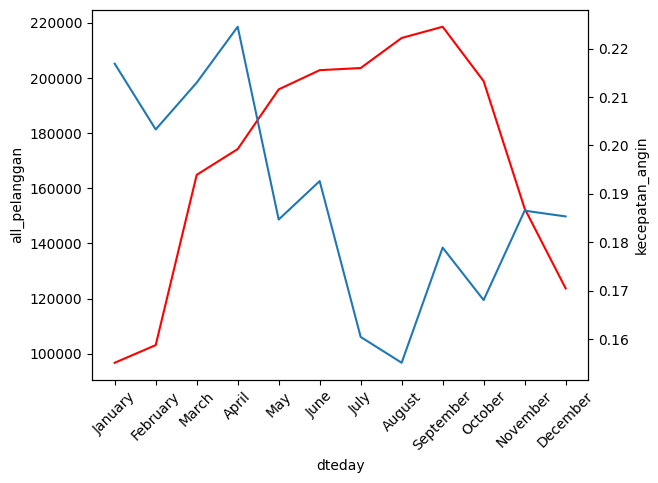

In [ ]:
fig, ax1 = plt.subplots() 
sns.lineplot(data=month,x="dteday", y="all_pelanggan", ax=ax1, color = "red")
plt.xticks(fontsize=10, rotation = 45) 
ax2 = ax1.twinx()
sns.lineplot(data=month,x="dteday", y="kecepatan_angin", ax=ax2)


MELIHAT HUBUNGAN ANTARA JUMLAH PENYEWA DENGAN KECEPATAN ANGIN SETIAP BULAN

In [ ]:
day_transformed = day.melt(id_vars=['dteday','season','weathersit','holiday','weekday','workingday'], value_vars=['casual','registered']) ###MENTRANSFORMASI VARIABEL CASUAL DAN REGISTERED MENJADI SATU VARIABEL KATEGORI DAN NILAINYA DISIMPAN DI VARIABEL VALUE
day_transformed['month'] = day_transformed['dteday'].dt.strftime('%B') ###MEMBUAT VARIABEL BULAN YANG BERLABEL JANUARY - DESEMBER###
day_transformed.head()

,dteday,season,weathersit,holiday,weekday,workingday,variable,value,month
0,2011-01-01,1,2,0,6,0,casual,331,January
1,2011-01-02,1,2,0,0,0,casual,131,January
2,2011-01-03,1,1,0,1,1,casual,120,January
3,2011-01-04,1,1,0,2,1,casual,108,January
4,2011-01-05,1,1,0,3,1,casual,82,January


In [ ]:
day_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      1462 non-null   datetime64[ns]
 1   season      1462 non-null   int64         
 2   weathersit  1462 non-null   int64         
 3   holiday     1462 non-null   int64         
 4   weekday     1462 non-null   int64         
 5   workingday  1462 non-null   int64         
 6   variable    1462 non-null   object        
 7   value       1462 non-null   int64         
 8   month       1462 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 102.9+ KB


In [ ]:
day_transformed.loc[day_transformed["season"] == 1, "season"] = "springer"
day_transformed.loc[day_transformed["season"] == 2, "season"] = "summer"
day_transformed.loc[day_transformed["season"] == 3, "season"] = "fall"
day_transformed.loc[day_transformed["season"] == 4, "season"] = "winter"


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8572\4281648104.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_transformed.loc[day_transformed["season"] == 1, "season"] = "springer"


In [ ]:
day_transformed.loc[day_transformed["weathersit"] == 1, "weathersit"] = "Cerah"
day_transformed.loc[day_transformed["weathersit"] == 2, "weathersit"] = "Berkabut"
day_transformed.loc[day_transformed["weathersit"] == 3, "weathersit"] = "Hujan Ringan"
day_transformed.loc[day_transformed["weathersit"] == 4, "weathersit"] = "Cuaca Buruk"

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8572\548367087.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cerah' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_transformed.loc[day_transformed["weathersit"] == 1, "weathersit"] = "Cerah"


In [ ]:
day_transformed.loc[day_transformed["weekday"] == 1, "weekday"] = "Senin"
day_transformed.loc[day_transformed["weekday"] == 2, "weekday"] = "Selasa"
day_transformed.loc[day_transformed["weekday"] == 3, "weekday"] = "Rabu"
day_transformed.loc[day_transformed["weekday"] == 4, "weekday"] = "Kamis"
day_transformed.loc[day_transformed["weekday"] == 5, "weekday"] = "Jum'at"
day_transformed.loc[day_transformed["weekday"] == 6, "weekday"] = "Sabtu"
day_transformed.loc[day_transformed["weekday"] == 0, "weekday"] = "Minggu"

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8572\2336791478.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Senin' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_transformed.loc[day_transformed["weekday"] == 1, "weekday"] = "Senin"


In [ ]:
day_transformed.loc[day_transformed["holiday"] == 1, "holiday"] = "Libur"
day_transformed.loc[day_transformed["holiday"] == 0, "holiday"] = "Tidak Libur"

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8572\3762191456.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Libur' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_transformed.loc[day_transformed["holiday"] == 1, "holiday"] = "Libur"


In [ ]:
day_transformed.loc[day_transformed["workingday"] == 0, "workingday"] = "Bukan Hari Kerja"
day_transformed.loc[day_transformed["workingday"] == 1, "workingday"] = "Hari Kerja"

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8572\3129285260.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Bukan Hari Kerja' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_transformed.loc[day_transformed["workingday"] == 0, "workingday"] = "Bukan Hari Kerja"


In [ ]:
day_transformed.head(10)

,dteday,season,weathersit,holiday,weekday,workingday,variable,value,month
0,2011-01-01,springer,Berkabut,Tidak Libur,Sabtu,Bukan Hari Kerja,casual,331,January
1,2011-01-02,springer,Berkabut,Tidak Libur,Minggu,Bukan Hari Kerja,casual,131,January
2,2011-01-03,springer,Cerah,Tidak Libur,Senin,Hari Kerja,casual,120,January
3,2011-01-04,springer,Cerah,Tidak Libur,Selasa,Hari Kerja,casual,108,January
4,2011-01-05,springer,Cerah,Tidak Libur,Rabu,Hari Kerja,casual,82,January
5,2011-01-06,springer,Cerah,Tidak Libur,Kamis,Hari Kerja,casual,88,January
6,2011-01-07,springer,Berkabut,Tidak Libur,Jum'at,Hari Kerja,casual,148,January
7,2011-01-08,springer,Berkabut,Tidak Libur,Sabtu,Bukan Hari Kerja,casual,68,January
8,2011-01-09,springer,Cerah,Tidak Libur,Minggu,Bukan Hari Kerja,casual,54,January
9,2011-01-10,springer,Cerah,Tidak Libur,Senin,Hari Kerja,casual,41,January


<Axes: xlabel='season', ylabel='value'>

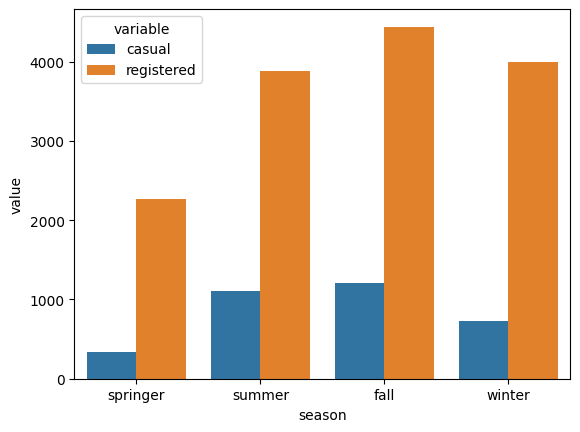

In [ ]:
sns.barplot(day_transformed, x="season", y="value", hue="variable",errorbar=None)

<Axes: xlabel='weathersit', ylabel='value'>

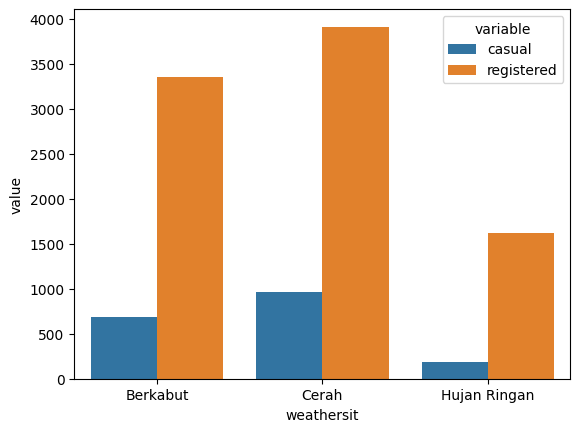

In [ ]:
sns.barplot(day_transformed, x="weathersit", y="value", hue="variable", errorbar=None)

<Axes: xlabel='month', ylabel='value'>

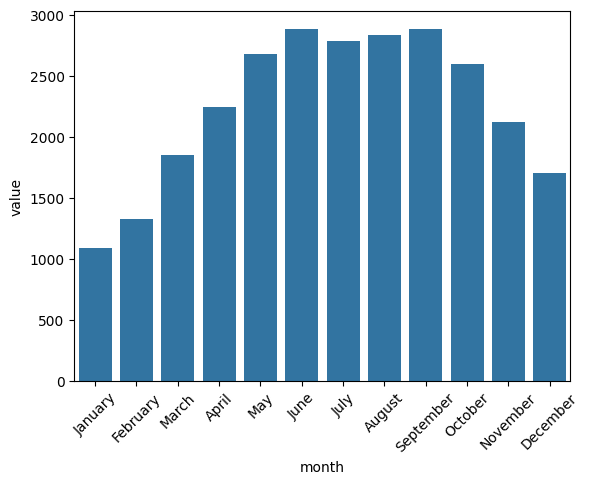

In [ ]:
plt.xticks(rotation=45) 
sns.barplot(data=day_transformed, x="month", y="value", errorbar=None)


<Axes: xlabel='weekday', ylabel='value'>

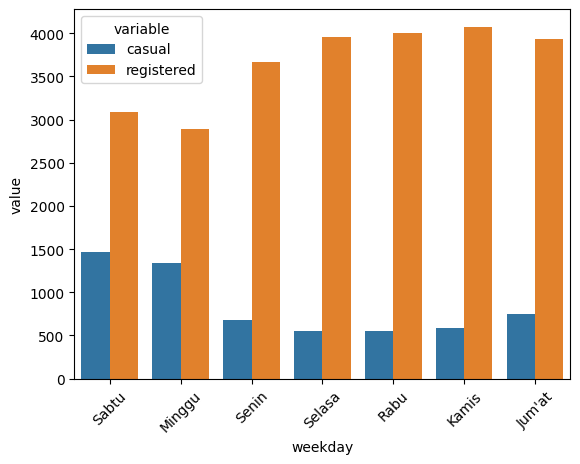

In [ ]:
plt.xticks(rotation=45) 
sns.barplot(day_transformed, x="weekday", y="value", hue="variable", errorbar=None)

<Axes: xlabel='holiday', ylabel='value'>

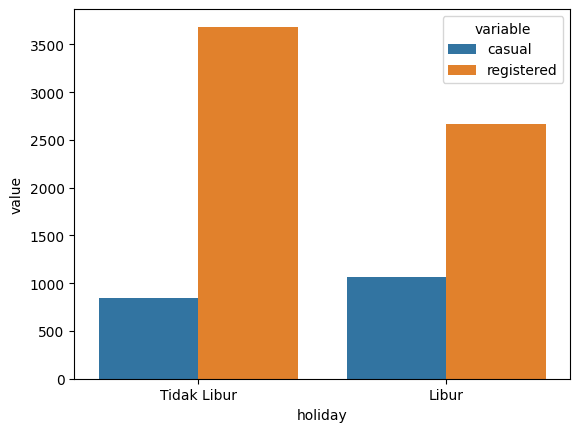

In [ ]:
sns.barplot(day_transformed, x="holiday", y="value", hue="variable", errorbar=None)

<Axes: xlabel='workingday', ylabel='value'>

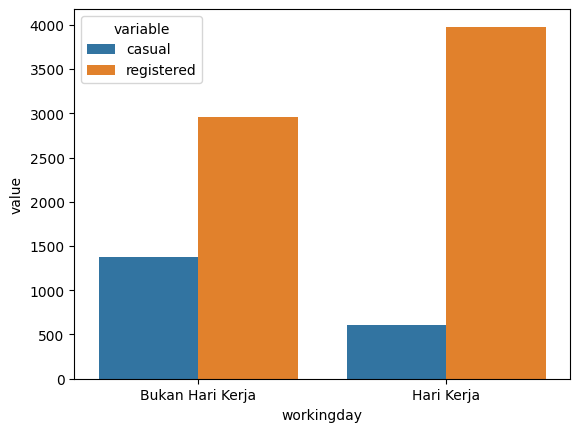

In [ ]:
sns.barplot(day_transformed, x="workingday", y="value", hue="variable", errorbar=None)

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [ ]:
hour["hr_group"] = hour.hr.apply(lambda x: "Pagi" if (x >= 4 and x <=10) 
                                 else ("Siang" if (x >= 11 and x <= 14) 
                                       else ("Sore" if (x >= 15 and x <= 18)
                                             else ("Malam" if (x >= 19)
                                                   else "Dini hari"))))

MELAKUKAN PENGELOMPOKKAN JAM PENYEWAAN BERDASARKAN 5 KATEGORI YAITU PAGI, SIANG, SORE, MALAM, DAN DINI HARI

In [ ]:
hour.groupby(by="hr_group").cnt.sum().sort_values(ascending=False)

hr_group
Sore         1057529
Pagi          774688
Siang         696305
Malam         676337
Dini hari      87820
Name: cnt, dtype: int64

In [ ]:
hour_transformed = hour.melt(id_vars=['dteday','hr_group'], value_vars=['casual','registered'])

<Axes: xlabel='hr_group', ylabel='value'>

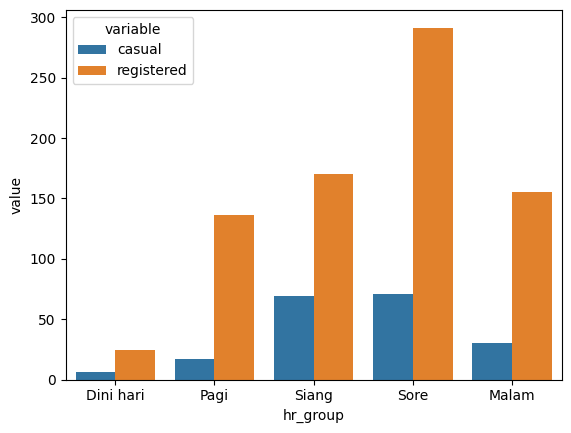

In [ ]:
sns.barplot(hour_transformed, x="hr_group", y="value", hue="variable", errorbar=None)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2